# _Importing Required Libraries_

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
%pip install lime

In [ ]:
%pip install shap

# _Calling Data, Preprocessing And Splitting_

In [2]:
url = './Data/breast-cancer.csv'

original_data = pd.read_csv(url)
data = original_data.copy()

data = data.drop(columns='id', axis=1)

data['diagnosis'] = [1 if i == "M" else 0 for i in data.diagnosis]


sc = StandardScaler()

data['perimeter_mean'] = sc.fit_transform(np.array(data.perimeter_mean).reshape(-1, 1))
data['area_mean'] = sc.fit_transform(np.array(data.area_mean).reshape(-1, 1))
data['area_se'] = sc.fit_transform(np.array(data.area_se).reshape(-1, 1))
data['radius_worst'] = sc.fit_transform(np.array(data.radius_worst).reshape(-1, 1))
data['texture_worst'] = sc.fit_transform(np.array(data.texture_worst).reshape(-1, 1))
data['perimeter_worst'] = sc.fit_transform(np.array(data.perimeter_worst).reshape(-1, 1))
data['area_worst'] = sc.fit_transform(np.array(data.area_worst).reshape(-1, 1))

In [3]:
pd.DataFrame(["Malignant" if a == 1 else "Bening" for a in data.diagnosis]).value_counts()

Bening       357
Malignant    212
dtype: int64

In [4]:
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,1.269934,0.984375,0.11840,0.27760,0.30010,0.14710,0.2419,...,1.886690,-1.359293,2.303601,2.001237,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,1.685955,1.908708,0.08474,0.07864,0.08690,0.07017,0.1812,...,1.805927,-0.369203,1.535126,1.890489,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,1.566503,1.558884,0.10960,0.15990,0.19740,0.12790,0.2069,...,1.511870,-0.023974,1.347475,1.456285,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,-0.592687,-0.764464,0.14250,0.28390,0.24140,0.10520,0.2597,...,-0.281464,0.133984,-0.249939,-0.550021,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,1.776573,1.826229,0.10030,0.13280,0.19800,0.10430,0.1809,...,1.298575,-1.466770,1.338539,1.220724,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,-0.387148,-0.505650,0.12780,0.17000,0.15780,0.08089,0.2087,...,-0.165498,-0.313836,-0.115009,-0.244320,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,1.138125,1.095295,0.09463,0.10900,0.11270,0.07400,0.1794,...,1.368983,0.322883,1.368325,1.275220,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,-0.072867,-0.218965,0.11890,0.16450,0.09366,0.05985,0.2196,...,0.163763,0.401048,0.099449,0.028859,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,-0.184080,-0.384207,0.12730,0.19320,0.18590,0.09353,0.2350,...,-0.161357,0.822813,-0.031609,-0.248363,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,-0.329482,-0.509063,0.11860,0.23960,0.22730,0.08543,0.2030,...,-0.244190,2.443109,-0.286278,-0.297409,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
print("total null values:",data.isnull().any().sum())

data.describe().T

total null values: 0


,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,3.725835e-01,0.483918,0.000000,0.000000,0.000000,1.000000,1.000000
radius_mean,569.0,1.412729e+01,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.0,1.928965e+01,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.0,-1.248757e-16,1.000880,-1.984504,-0.691956,-0.235980,0.499677,3.976130
area_mean,569.0,-2.185325e-16,1.000880,-1.454443,-0.667195,-0.295187,0.363507,5.250529
smoothness_mean,569.0,9.636028e-02,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.0,1.043410e-01,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.0,8.879932e-02,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.0,4.891915e-02,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.0,1.811619e-01,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


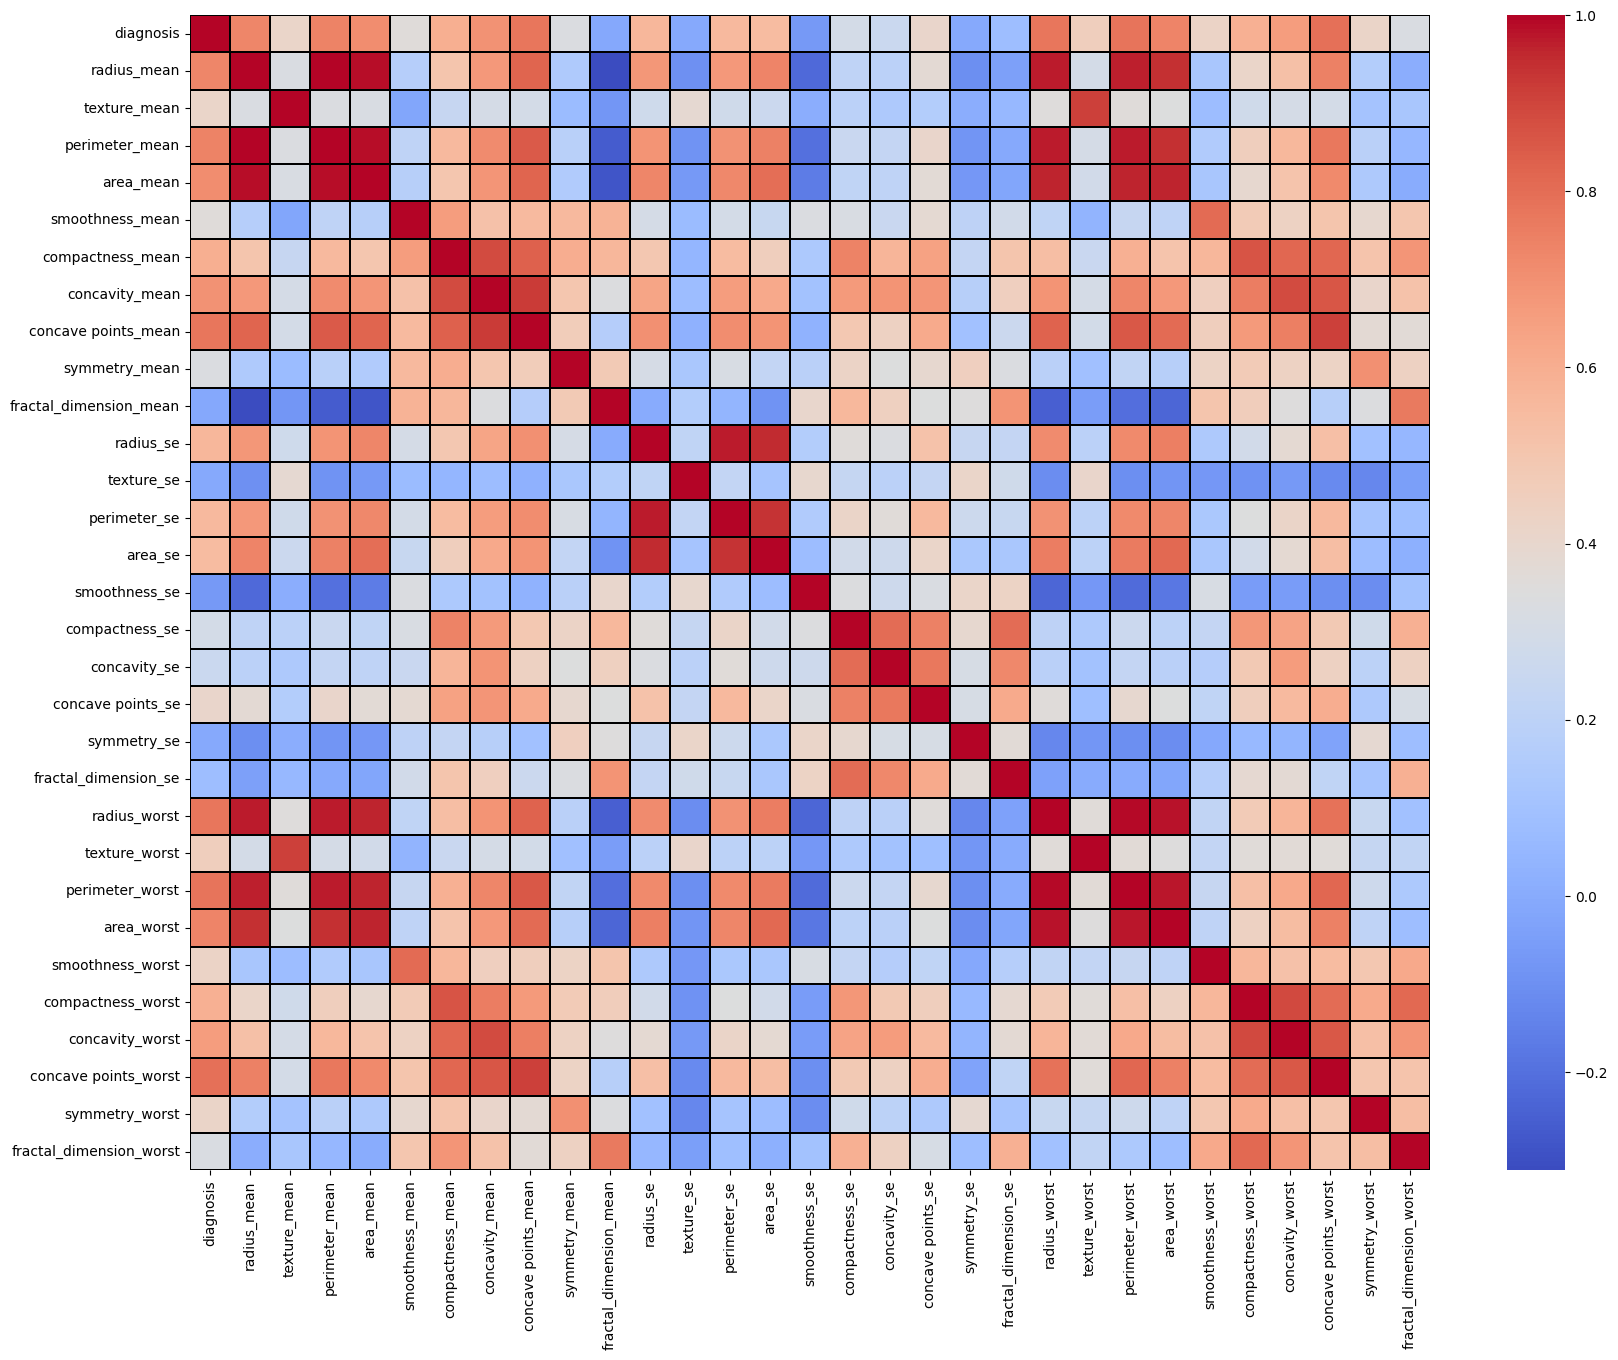

In [6]:
plt.figure(figsize=(20, 15))
sns.heatmap(data=data.corr(), cmap='coolwarm', fmt='.2f',linewidths=0.05, linecolor='black')
plt.show()

In [7]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [8]:
y = data['diagnosis'].values
x = data.drop(columns='diagnosis').values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# _Test On Machine Learning Algorithms_

## LogisticRegression

In [9]:
model_logreg = LogisticRegression(
    penalty=None,
    dual=False,
    C=0.5,
    fit_intercept=True,
    solver='lbfgs',
    max_iter=100,
    multi_class='multinomial',
    verbose=10
)

model_logreg.fit(x_train, y_train)
y_pred_logreg = model_logreg.predict(x_test)

#! Model output validation

print(f'accuracy_score: %{accuracy_score(y_test, y_pred_logreg) * 100}')
print(f'precision_score: %{precision_score(y_test, y_pred_logreg) * 100}')
print(f'f1_score: %{f1_score(y_test, y_pred_logreg) * 100}')
print(f'recall_score: %{recall_score(y_test, y_pred_logreg) * 100}')
print(f'roc_auc_score: %{roc_auc_score(y_test, y_pred_logreg) * 100}')

print(f'confusion_matrix: \n{confusion_matrix(y_test, y_pred_logreg)}')

report = classification_report(y_test, y_pred_logreg)
print("Classification Report:")
print(report)

accuracy_score: %96.49122807017544
precision_score: %100.0
f1_score: %95.1219512195122
recall_score: %90.69767441860465
roc_auc_score: %95.34883720930232
confusion_matrix: 
[[71  0]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### GridSearch

In [10]:
?model_logreg

Type:        LogisticRegression
String form: LogisticRegression(C=0.5, multi_class='multinomial', penalty=None, verbose=10)
File:        c:\users\90530\appdata\local\programs\python\python311\lib\site-packages\sklearn\linear_model\_logistic.py
Docstring:  
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied)

In [ ]:
# Outputs
"""
    best_params_: {'C': 0.5, 'dual': False, 'fit_intercept': True, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': None, 'solver': 'lbfgs'}
    best_score_: 0.9736714975845411
"""

params_logreg = [
    {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'dual': [False, True],
        'C': [0.5, 1, 1.5],
        'fit_intercept': [True, False],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'max_iter': [50, 100, 200],
        'multi_class' : ['auto', 'ovr', 'multinomial']
    }
]

grid_logreg = GridSearchCV(
    estimator=model_logreg, param_grid=params_logreg, cv=10, n_jobs=-1
)

grid_logreg.fit(x_train, y_train)

print("best_params_:", grid_logreg.best_params_)
print("best_score_:", grid_logreg.best_score_)

## SVC

In [12]:
model_svc = SVC(
    C=0.5, 
    degree=3, 
    kernel='poly', 
    gamma='auto',
    shrinking=True,
    probability=False,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=42
)

model_svc.fit(x_train, y_train)

y_pred_svc = model_svc.predict(x_test)

#! Model output validation

print(f'accuracy_score: %{accuracy_score(y_test, y_pred_svc) * 100}')
print(f'precision_score: %{precision_score(y_test, y_pred_svc) * 100}')
print(f'f1_score: %{f1_score(y_test, y_pred_svc) * 100}')
print(f'recall_score: %{recall_score(y_test, y_pred_svc) * 100}')
print(f'roc_auc_score: %{roc_auc_score(y_test, y_pred_svc) * 100}')

print(f'confusion_matrix: \n{confusion_matrix(y_test, y_pred_svc)}')

report = classification_report(y_test, y_pred_svc)
print("Classification Report:")
print(report)

accuracy_score: %96.49122807017544
precision_score: %97.5609756097561
f1_score: %95.23809523809524
recall_score: %93.02325581395348
roc_auc_score: %95.80740255486407
confusion_matrix: 
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### GridSearch

In [71]:
?model_svc

Type:        SVC
String form: SVC(kernel='linear', probability=True)
File:        c:\users\90530\appdata\local\programs\python\python311\lib\site-packages\sklearn\svm\_classes.py
Docstring:  
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
---

In [77]:
"""
    best_params_: {'C': 0.5, 'break_ties': False, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly', 'probability': False, 'shrinking': True}
    best_score_: 0.9604347826086957
"""

params_svc = [
    {
        'C': [0.5, 1, 1.5],
        'degree': [2, 3, 5, 7],
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'shrinking': [True, False],
        'probability': [False, True],
        'decision_function_shape': ['ovr', 'ovo'],
        'break_ties': [False, True],
        'random_state': [42]
    }
]

grid_svc = GridSearchCV(
    estimator=model_svc, param_grid=params_svc, cv=10, n_jobs=-1
)

grid_svc.fit(x_train, y_train)

print("best_params_:", grid_svc.best_params_)
print("best_score_:", grid_svc.best_score_)

best_params_: {'C': 0.5, 'break_ties': False, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly', 'probability': False, 'random_state': 42, 'shrinking': True}
best_score_: 0.9604347826086957


## DecisionTreeClassifier

In [13]:
model_dtc = DecisionTreeClassifier(
    criterion='entropy',
    splitter='random',
    min_samples_split=11,
    min_samples_leaf=6,
    random_state=42
)   

model_dtc.fit(x_train, y_train)

y_pred_dtc = model_dtc.predict(x_test)

#! Model output validation

print(f'accuracy_score: %{accuracy_score(y_test, y_pred_dtc) * 100}')
print(f'precision_score: %{precision_score(y_test, y_pred_dtc) * 100}')
print(f'f1_score: %{f1_score(y_test, y_pred_dtc) * 100}')
print(f'recall_score: %{recall_score(y_test, y_pred_dtc) * 100}')
print(f'roc_auc_score: %{roc_auc_score(y_test, y_pred_dtc) * 100}')

print(f'confusion_matrix: \n{confusion_matrix(y_test, y_pred_dtc)}')

report = classification_report(y_test, y_pred_dtc)
print("Classification Report:")
print(report)

accuracy_score: %98.24561403508771
precision_score: %97.67441860465115
f1_score: %97.67441860465115
recall_score: %97.67441860465115
roc_auc_score: %98.1329839502129
confusion_matrix: 
[[70  1]
 [ 1 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### GridSearch

In [79]:
?model_dtc

Type:        DecisionTreeClassifier
String form:
DecisionTreeClassifier(criterion='entropy', min_samples_split=8,
                       random_state=42, splitter='random')
File:        c:\users\90530\appdata\local\programs\python\python311\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all

In [14]:
"""
    best_params_: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 11, 'splitter': 'random'}
    best_score_: 0.9580193236714976
"""
params_dtc = [
    {
        'criterion': ["gini", "entropy", "log_loss"],
        'splitter': ["best", "random"],
        'min_samples_split': np.arange(1,30),
        'min_samples_leaf': [0.5, 1, 1.5, 2, 3, 7],

    }
]

grid_dtc = GridSearchCV(
    estimator=model_dtc, param_grid=params_dtc, cv=10, n_jobs=-1
)

grid_dtc.fit(x_train, y_train)

print("best_params_:", grid_dtc.best_params_)
print("best_score_:", grid_dtc.best_score_)

best_params_: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 11, 'splitter': 'random'}
best_score_: 0.9580193236714976


## RandomForestClassifier

In [15]:
model_rfc = RandomForestClassifier(
    criterion='gini',
    min_samples_split=3,
    n_estimators=100,
    random_state=42
)

model_rfc.fit(x_train, y_train)

y_pred_rfc = model_rfc.predict(x_test)

#! Model output validation

print(f'accuracy_score: %{accuracy_score(y_test, y_pred_rfc) * 100}')
print(f'precision_score: %{precision_score(y_test, y_pred_rfc) * 100}')
print(f'f1_score: %{f1_score(y_test, y_pred_rfc) * 100}')
print(f'recall_score: %{recall_score(y_test, y_pred_rfc) * 100}')
print(f'roc_auc_score: %{roc_auc_score(y_test, y_pred_rfc) * 100}')

print(f'confusion_matrix: \n{confusion_matrix(y_test, y_pred_rfc)}')

report = classification_report(y_test, y_pred_rfc)
print("Classification Report:")
print(report)

accuracy_score: %96.49122807017544
precision_score: %97.5609756097561
f1_score: %95.23809523809524
recall_score: %93.02325581395348
roc_auc_score: %95.80740255486407
confusion_matrix: 
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### GridSearch

In [105]:
?model_rfc

Type:        RandomForestClassifier
String form:
RandomForestClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       min_samples_split=6, random_state=42)
Length:      100
File:        c:\users\90530\appdata\local\programs\python\python311\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entrop

In [116]:
"""
    best_params_: {'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 100}
    best_score_: 0.973623188405797
"""

params_rfc = [
    {
        'n_estimators': [50, 100, 200],
        'criterion': ["gini", "entropy", "log_loss"],
        'min_samples_split': np.arange(2, 10),
    }
]

grid_rfc = GridSearchCV(
    estimator=RandomForestClassifier(), param_grid=params_rfc, cv=10, n_jobs=-1
)
grid_rfc.fit(x_train, y_train)

print("best_params_:", grid_rfc.best_params_)
print("best_score_:", grid_rfc.best_score_)

best_params_: {'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 100}
best_score_: 0.9714009661835747


## XGBClassifier

In [51]:
model_xgbc = XGBClassifier(
    learning_rate=0.3,
    subsample=0.8,
    max_depth=3,
    n_estimators=200,
    gamma=0.2,
    reg_alpha=0.5,
    reg_lambda=0.1,
    scale_pos_weight=2
)

model_xgbc.fit(x_train, y_train)

y_pred_xgbc = model_xgbc.predict(x_test)

print(f'accuracy_score: %{accuracy_score(y_test, y_pred_xgbc) * 100}')
print(f'precision_score: %{precision_score(y_test, y_pred_xgbc) * 100}')
print(f'f1_score: %{f1_score(y_test, y_pred_xgbc) * 100}')
print(f'recall_score: %{recall_score(y_test, y_pred_xgbc) * 100}')
print(f'roc_auc_score: %{roc_auc_score(y_test, y_pred_xgbc) * 100}')

print(f'confusion_matrix: \n{confusion_matrix(y_test, y_pred_xgbc)}')

report = classification_report(y_test, y_pred_xgbc)
print("Classification Report:")
print(report)

accuracy_score: %97.36842105263158
precision_score: %97.61904761904762
f1_score: %96.47058823529412
recall_score: %95.34883720930233
roc_auc_score: %96.97019325253848
confusion_matrix: 
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### GridSearch

In [119]:
?model_xgbc

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> s=None, n_estimators=100, n_jobs=None,
           num_parallel_tree=None, predictor=None, ...)
File:        c:\users\90530\appdata\local\programs\python\python311\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb'

In [ ]:
params_xgbc = [
    {
        'max_depth': [3, 5, 7],                   
        'learning_rate': [0.01, 0.1, 0.2],     
        'n_estimators': [100, 200, 300],      
        '': [0.8, 0.9],              
        'colsample_bytree': [0.8, 0.9],          
        'gamma': [0, 0.1, 0.2],                   
        'reg_alpha': [0, 0.1, 0.5],               
        'reg_lambda': [0, 0.1, 0.5],            
        'scale_pos_weight': [0.2, 1, 2, 5]             
    }
]

grid_xgbc = GridSearchCV(
    estimator=model_xgbc, param_grid=params_xgbc, cv=10, n_jobs=-1
)
grid_xgbc.fit(x_train, y_train)

print("best_params_:", grid_xgbc.best_params_)
print("best_score_:", grid_xgbc.best_score_)

## XGBRFClassifier

In [16]:
model_xgbrfc = XGBRFClassifier()

model_xgbrfc.fit(x_train, y_train)

y_pred_xgbrfc = model_xgbrfc.predict(x_test)

#! Model output validation

print(f'accuracy_score: %{accuracy_score(y_test, y_pred_xgbrfc) * 100}')
print(f'precision_score: %{precision_score(y_test, y_pred_xgbrfc) * 100}')
print(f'f1_score: %{f1_score(y_test, y_pred_xgbrfc) * 100}')
print(f'recall_score: %{recall_score(y_test, y_pred_xgbrfc) * 100}')
print(f'roc_auc_score: %{roc_auc_score(y_test, y_pred_xgbrfc) * 100}')

print(f'confusion_matrix: \n{confusion_matrix(y_test, y_pred_xgbrfc)}')

report = classification_report(y_test, y_pred_xgbrfc)
print("Classification Report:")
print(report)

accuracy_score: %95.6140350877193
precision_score: %95.23809523809523
f1_score: %94.11764705882352
recall_score: %93.02325581395348
roc_auc_score: %95.10317720275138
confusion_matrix: 
[[69  2]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
?model_xgbrfc

In [ ]:
params_xgbrfc = [
    {
        'max_depth': [3, 5, 7],                   
        'learning_rate': [0.01, 0.1, 0.2],      
        'n_estimators': [100, 200, 300],       
        'subsample': [0.8, 0.9],               
        'colsample_bynode': [0.8, 0.9],          
        'colsample_bytree': [0.8, 0.9],        
        'gamma': [0, 0.1, 0.2],                  
        'reg_alpha': [0, 0.1, 0.5],              
        'reg_lambda': [0, 0.1, 0.5],              
        'scale_pos_weight': [1, 2, 5]          
    }
]

grid_xgbrfc = GridSearchCV(
    estimator=model_xgbrfc, param_grid=params_xgbrfc, cv=10
)

grid_xgbrfc.fit(x_train, y_train)

print("best_params_:", grid_xgbrfc.best_params_)
print("best_score_:", grid_xgbrfc.best_score_)

## LGBMClassifier

In [17]:
model_lgbmc = LGBMClassifier()

model_lgbmc.fit(x_train, y_train)

y_pred_lgbmc = model_lgbmc.predict(x_test)

#! Model output validation

print(f'accuracy_score: %{accuracy_score(y_test, y_pred_lgbmc) * 100}')
print(f'precision_score: %{precision_score(y_test, y_pred_lgbmc) * 100}')
print(f'f1_score: %{f1_score(y_test, y_pred_lgbmc) * 100}')
print(f'recall_score: %{recall_score(y_test, y_pred_lgbmc) * 100}')
print(f'roc_auc_score: %{roc_auc_score(y_test, y_pred_lgbmc) * 100}')

print(f'confusion_matrix: \n{confusion_matrix(y_test, y_pred_lgbmc)}')

report = classification_report(y_test, y_pred_lgbmc)
print("Classification Report:")
print(report)

accuracy_score: %97.36842105263158
precision_score: %97.61904761904762
f1_score: %96.47058823529412
recall_score: %95.34883720930233
roc_auc_score: %96.97019325253848
confusion_matrix: 
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### GridSearch

In [ ]:
?model_lgbmc

In [ ]:
params_lgbmc = [
    {

    }
]

grid_lgbmc = GridSearchCV(
    estimator=model_lgbmc, param_grid=params_lgbmc, cv=10
)

grid_lgbmc.fit(x_train, y_train)

print("best_params_:", grid_lgbmc.best_params_)
print("best_score_:", grid_lgbmc.best_score_)

## KNeighborsClassifier

In [18]:
model_knc = KNeighborsClassifier(
    n_neighbors=5, 
    weights='uniform',
    algorithm='auto',
    leaf_size=10,
    p=2
)

model_knc.fit(x_train, y_train)

y_pred_knc = model_knc.predict(x_test)

#! Model output validation

print(f'accuracy_score: %{accuracy_score(y_test, y_pred_knc) * 100}')
print(f'precision_score: %{precision_score(y_test, y_pred_knc) * 100}')
print(f'f1_score: %{f1_score(y_test, y_pred_knc) * 100}')
print(f'recall_score: %{recall_score(y_test, y_pred_knc) * 100}')
print(f'roc_auc_score: %{roc_auc_score(y_test, y_pred_knc) * 100}')

print(f'confusion_matrix: \n{confusion_matrix(y_test, y_pred_knc)}')

report = classification_report(y_test, y_pred_knc)
print("Classification Report:")
print(report)

accuracy_score: %97.36842105263158
precision_score: %97.61904761904762
f1_score: %96.47058823529412
recall_score: %95.34883720930233
roc_auc_score: %96.97019325253848
confusion_matrix: 
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### GridSearch

In [ ]:
? model_knc

In [ ]:
"""
best_params_: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
best_score_: 0.918792270531401
"""

params_knc = [
    {
        'n_neighbors': np.arange(2,10),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
    }
]

grid_knc = GridSearchCV(
    estimator=model_knc, param_grid=params_knc, cv=10
)

grid_knc.fit(x_train, y_train)

print("best_params_:", grid_knc.best_params_)
print("best_score_:", grid_knc.best_score_)

## CatBoostClassifier

In [20]:
model_cbc = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=False 
)

model_cbc.fit(x_train, y_train)

y_pred_cbc = model_cbc.predict(x_test)

#! Model output validation

print(f'accuracy_score: %{accuracy_score(y_test, y_pred_cbc) * 100}')
print(f'precision_score: %{precision_score(y_test, y_pred_cbc) * 100}')
print(f'f1_score: %{f1_score(y_test, y_pred_cbc) * 100}')
print(f'recall_score: %{recall_score(y_test, y_pred_cbc) * 100}')
print(f'roc_auc_score: %{roc_auc_score(y_test, y_pred_cbc) * 100}')

print(f'confusion_matrix: \n{confusion_matrix(y_test, y_pred_cbc)}')

report = classification_report(y_test, y_pred_cbc)
print("Classification Report:")
print(report)

accuracy_score: %97.36842105263158
precision_score: %97.61904761904762
f1_score: %96.47058823529412
recall_score: %95.34883720930233
roc_auc_score: %96.97019325253848
confusion_matrix: 
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### GridSearch

In [ ]:
?model_cbc

In [ ]:
params_cbc = [
    {
        'iterations': [500],
        'learning_rate': [0.01, 0.03, 0.05],
        'depth': [6, 4, 8]
    }
]

grid_cbc = GridSearchCV(
    estimator=model_cbc, param_grid=params_cbc, cv=10, n_jobs=-1
)

grid_cbc.fit(x_train, y_train)

print("best_params_:", grid_cbc.best_params_)
print("best_score_:", grid_cbc.best_score_)

## GradientBoostingClassifier

In [21]:
model_gbc = GradientBoostingClassifier(
    loss='exponential',
    learning_rate=0.1,
    criterion='friedman_mse'
)

model_gbc.fit(x_train, y_train)

y_pred_gbc = model_gbc.predict(x_test)

#! Model output validation

print(f'accuracy_score: %{accuracy_score(y_test, y_pred_gbc) * 100}')
print(f'precision_score: %{precision_score(y_test, y_pred_gbc) * 100}')
print(f'f1_score: %{f1_score(y_test, y_pred_gbc) * 100}')
print(f'recall_score: %{recall_score(y_test, y_pred_gbc) * 100}')
print(f'roc_auc_score: %{roc_auc_score(y_test, y_pred_gbc) * 100}')

print(f'confusion_matrix: \n{confusion_matrix(y_test, y_pred_gbc)}')

report = classification_report(y_test, y_pred_gbc)
print("Classification Report:")
print(report)

accuracy_score: %95.6140350877193
precision_score: %95.23809523809523
f1_score: %94.11764705882352
recall_score: %93.02325581395348
roc_auc_score: %95.10317720275138
confusion_matrix: 
[[69  2]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### GridSearch

In [ ]:
?model_gbc

In [ ]:
"""
    best_params_: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential'}
    best_score_: 0.9648309178743961
"""

params_gbc = [
    {
        'loss': ['log_loss', 'deviance', 'exponential'],
        'learning_rate': [0.1, 0.3, 0.5],
        'criterion': ['friedman_mse', 'squared_error'],
    }
]

grid_gbc = GridSearchCV(
    estimator=model_gbc, param_grid=params_gbc, cv=10, n_jobs=-1
)

grid_gbc.fit(x_train, y_train)

print("best_params_:", grid_gbc.best_params_)
print("best_score_:", grid_gbc.best_score_)

# Outputs

In [23]:
y_pred = pd.DataFrame()

y_pred['LogisticRegression Prediction'] = y_pred_logreg
y_pred['SVC Prediction'] = y_pred_svc
y_pred['DecisionTreeClassifier Prediction'] = y_pred_dtc
y_pred['RandomForestClassifier Prediction'] = y_pred_rfc
y_pred['XGBClassifier Prediction'] = y_pred_xgbc
y_pred['XGBRFClassifier Prediction'] = y_pred_xgbrfc
y_pred['LGBMClassifier Prediction'] = y_pred_lgbmc
y_pred['KNeighborsClassifier Prediction'] = y_pred_knc
y_pred['CatBoostClassifier Prediction'] = y_pred_cbc
y_pred['GradientBoostingClassifier Prediction'] = y_pred_gbc


"""
    Enter a row of data from x_test to see all predictions
"""
row = int(input('Please etner a row from x_test:'))

counter_1 = 0
counter_0 = 0
for i in range(10):

    if y_pred[ row : row+1 ].values[0][i] == 1:
        counter_1 += 1
    elif y_pred[ row : row+1 ].values[0][i] == 0:
        counter_0 +=1

print(f'Total number of Bening is {counter_0} \nTotal number of Malignant is {counter_1}')

Total number of Bening is 10 
Total number of Malignant is 0


# XAI (Explainable Artificial Intelligent)

#### LIME (Local Interpretable Model-agnostic Explanations)

In [48]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=x_train,
    mode='classification',
    feature_names=data.iloc[:, 1:].columns,
    class_names=['0-Bening', '1-Malignant']
)

exp_logreg = explainer.explain_instance(
    data_row=x_test[0],
    predict_fn=model_xgbc.predict_proba
)

exp_logreg.show_in_notebook(show_table=True)

#### Shap

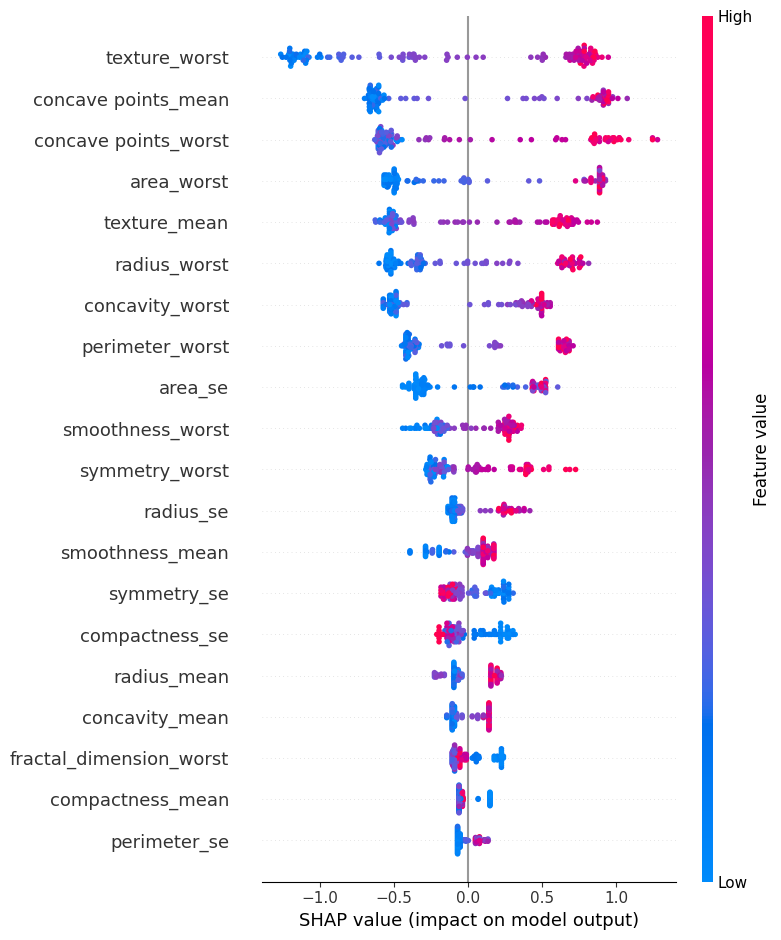

In [50]:
import shap

explainer = shap.Explainer(model_xgbc, x_train)

shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, features=x_test, feature_names=data.iloc[:, 1:].columns)

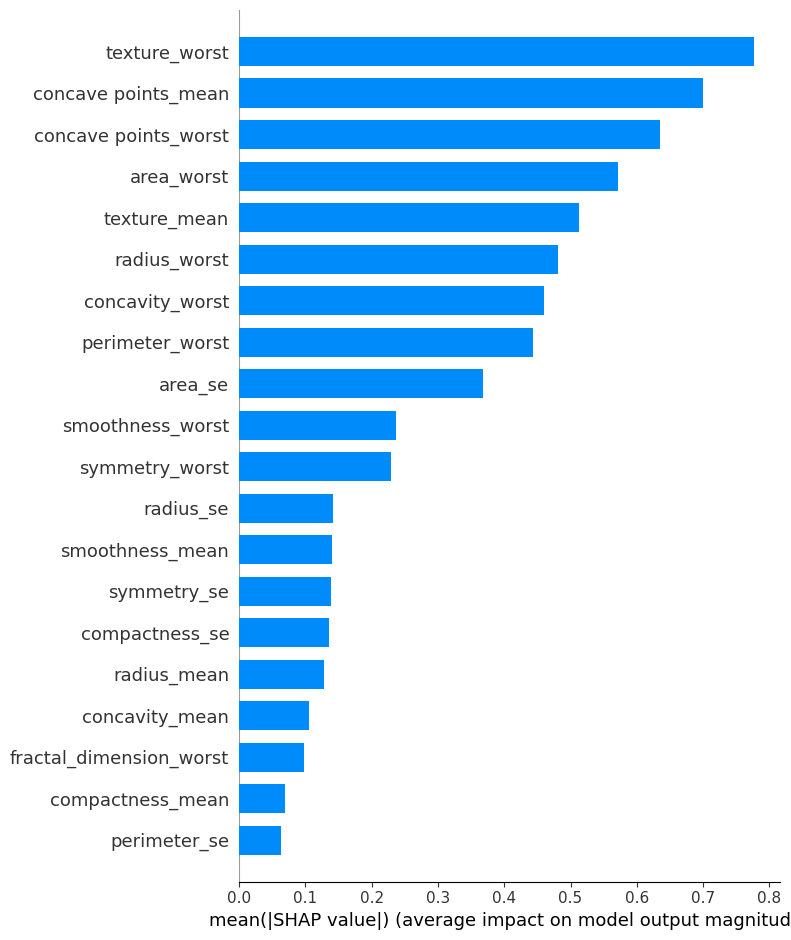

In [51]:
shap.summary_plot(shap_values, features=x_test, plot_type="bar", feature_names=data.iloc[:, 1:].columns)

In [52]:
#! Thank you for reviewing my little project. If there is any mistake in this project that I did on the learning path, 
#? or if you have valuable advice, please contackt me(ekincimuhammedenes13@gmail.com)